In [1]:
#Imports
import sys
sys.path.append('../../python/')
import NGC5533_functions as nf

import numpy as np
import matplotlib.pyplot as plt
import scipy.optimize as opt
import lmfit as lm
import dataPython as dp

In [2]:
data = dp.getXYdata_wXYerr('../data/100kpc_data.txt')
r_dat = np.asarray(data['xx'])
v_dat = np.asarray(data['yy'])
v_err0 = np.asarray(data['ex'])
v_err1 = np.asarray(data['ey'])

#change r_dat so it's strictly increasing
r_dat, v_dat, v_err0, v_err1 = (list(a) for a in zip(*sorted(zip(r_dat, v_dat, v_err0, v_err1))))
#converting v_err1 to an array
v_err1 = np.asarray(v_err1)

In [3]:
def f(r,M):
    return np.sqrt(nf.bh_v(r_dat,M,load=True)**2 + nf.h_v(r,load=True)**2 + nf.b_v(r,load=True)**2 + nf.d_v(r,load=True)**2)

In [4]:
#Setup
weighdata = 1/v_err1
l_mod = lm.Model(f)
params = l_mod.make_params()
#Black Hole
params.add('M', value=nf.Mbh_def, min=0) #Mass
#Bulge
params.add('n', value=nf.n_c, min=0) 
params.add('re', value=nf.re_c, min=0) 
#Disk
params.add('h', value=nf.h_c, min=0, max=1000)
params.add('d_rho00', value=nf.drho00_c, min=0)
#Halo
params.add('rc', value=nf.h_rc, min=0)   #Radius (magnitude)
params.add('h_rho00', value=nf.hrho00_c, min=0) #Density (halo)

#Do fit
l_fit = l_mod.fit(v_dat,params,r=r_dat,weights=weighdata)

In [5]:
#Define Stuff
l_dict = l_fit.best_values
#Black Hole
l_M = l_dict['M']

l_curve = f(r_dat,l_M)

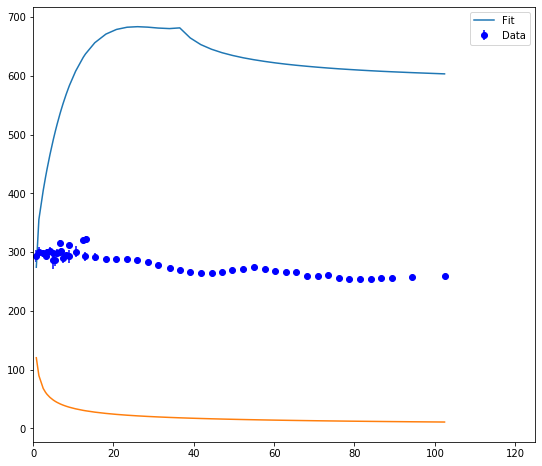

In [10]:
fig = plt.figure(figsize=(9.0,8.0))

plt.xlim(0,125)

plt.errorbar(r_dat,v_dat,yerr=v_err1,fmt='bo',label='Data')
plt.plot(r_dat,l_curve,label='Fit')
plt.plot(r_dat,nf.bh_v(r_dat,l_M),label='Black Hole Only')

plt.legend()
plt.savefig('Fitting_with_library.png')
plt.show()

l_fit

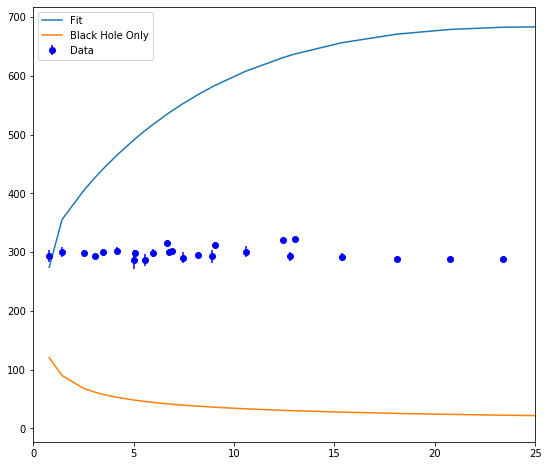

In [11]:
fig = plt.figure(figsize=(9.0,8.0))

plt.xlim(0,25)

plt.errorbar(r_dat,v_dat,yerr=v_err1,fmt='bo',label='Data')
plt.plot(r_dat,l_curve,label='Fit')
plt.plot(r_dat,nf.bh_v(r_dat,l_M),label='Black Hole Only')

plt.legend()
plt.savefig('Fitting_with_library.png')
plt.show()

l_fit